### Problem 1 (50 Points): SImple Linear Regression  

In this problem we will be using a sample dataset that contains Boston House Pricing data, more details about the dataset please refer to: https://scikit-learn.org/stable/datasets/toy_dataset.html


To get started, we import house price data from sklearn datasets: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
##import house price data from sklearn datasets
boston = datasets.load_boston()
#the data is imported as a json object by default
#to create a pandas dataframe from it we need to do the following

names = boston.feature_names #used to assign names to columns

bos = pd.DataFrame(boston.data) #import data into dataframe
bos.columns = names #assign column names 
bos #display first five rows

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [ ]:
target = boston.target  #this is price variable what we will be trying to predict
bos['PRICE'] = target  #create new column with target
bos

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

(1) Let's perform a very simple regression on two variables. Please choose 'RM' vs 'PRICE' as feature and target, as these should be directly correlated. Please first create a scatter plot between 'RM' vs 'PRICE'. What did you find?

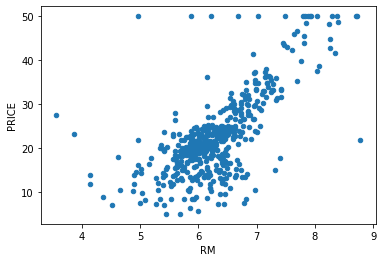

In [ ]:
import matplotlib.pyplot as plt

bos.plot.scatter(x = 'RM', y = 'PRICE');

(2) To get good regression results, sometimes we need normalize the dataset first. Please perform data normalization to dataset `bos`. Hint: first remove column `PRICE` from the original dataset (the target does not need to be normalized, we only normalize features), then apply preprocessing.MinMaxScaler() function to all features to get normalized feature values). More details:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
from sklearn import preprocessing

bos.drop('PRICE', axis=1, inplace=True)
scaler = preprocessing.MinMaxScaler()
scaler.fit(bos)
scaled = scaler.fit_transform(bos)
scaled_bos = pd.DataFrame(scaled, columns = bos.columns)
scaled_bos.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT  
0  0.000000  0.208015  0.287234  1.000000  0.089680  
1  0.043478  0.104962  0.553191  1.000000  0.204470  
2  0.043478  0.104962  0.553191  0.989737  0.063466  
3  0.086957  0.066794  0.648936  0.994276  0.033389  
4  0.086957  0.066794  0.648936  1.000000  0.099338

(3) Split the normalized dataset into training and testing set (you can decide the testing set size/percentage). Train a simple linear regression model with `RM` as predictor and `PRICE` as target using the normalized training dataset, and test it on test dataset. Please print the actual price vs predicted price.

In [ ]:
import sklearn.datasets as sk_data
import sklearn.utils as utils
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split


x = scaled_bos.RM
bos['PRICE']=target
y=bos.PRICE
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

# Split the data into training/testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
y_pred



array([[23.73238293],
       [26.92950201],
       [19.68456842],
       [20.45112913],
       [22.61993506],
       [22.45166563],
       [19.03953562],
       [21.47009399],
       [21.98425056],
       [20.09589368],
       [19.38542277],
       [19.88088275],
       [ 5.99865516],
       [22.01229547],
       [17.11378553],
       [29.00482492],
       [18.71234507],
       [ 9.37339197],
       [37.37155468],
       [21.5729253 ],
       [22.08708188],
       [24.34937082],
       [17.16052704],
       [25.38703227],
       [19.89957935],
       [14.48691283],
       [18.66560356],
       [26.64905296],
       [19.46955748],
       [17.91773945],
       [15.84241654],
       [23.82586594],
       [32.11780929],
       [13.87927324],
       [19.87153445],
       [17.12313383],
       [30.92122671],
       [18.61886206],
       [20.44178083],
       [22.13382339],
       [14.14102568],
       [27.78019743],
       [38.8579346 ],
       [16.04807917],
       [23.74173123],
       [17

In [ ]:
print(y_test)

[[23.6]
 [32.4]
 [13.6]
 [22.8]
 [16.1]
 [20. ]
 [17.8]
 [14. ]
 [19.6]
 [16.8]
 [21.5]
 [18.9]
 [ 7. ]
 [21.2]
 [18.5]
 [29.8]
 [18.8]
 [10.2]
 [50. ]
 [14.1]
 [25.2]
 [29.1]
 [12.7]
 [22.4]
 [14.2]
 [13.8]
 [20.3]
 [14.9]
 [21.7]
 [18.3]
 [23.1]
 [23.8]
 [15. ]
 [20.8]
 [19.1]
 [19.4]
 [34.7]
 [19.5]
 [24.4]
 [23.4]
 [19.7]
 [28.2]
 [50. ]
 [17.4]
 [22.6]
 [15.1]
 [13.1]
 [24.2]
 [19.9]
 [24. ]
 [18.9]
 [35.4]
 [15.2]
 [26.5]
 [43.5]
 [21.2]
 [18.4]
 [28.5]
 [23.9]
 [18.5]
 [25. ]
 [35.4]
 [31.5]
 [20.2]
 [24.1]
 [20. ]
 [13.1]
 [24.8]
 [30.8]
 [12.7]
 [20. ]
 [23.7]
 [10.8]
 [20.6]
 [20.8]
 [ 5. ]
 [20.1]
 [48.5]
 [10.9]
 [ 7. ]
 [20.9]
 [17.2]
 [20.9]
 [ 9.7]
 [19.4]
 [29. ]
 [16.4]
 [25. ]
 [25. ]
 [17.1]
 [23.2]
 [10.4]
 [19.6]
 [17.2]
 [27.5]
 [23. ]
 [50. ]
 [17.9]
 [ 9.6]
 [17.2]
 [22.5]
 [21.4]]


(4) Print the prediction accuracy (i.e., calculate the coefficient of determination $R^2$ by using LinearRegression().score() function) and mean squared error (MSE). What did you find?

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
# Computed over the *test* data
print('Coefficient of determination: %.2f'
      % metrics.r2_score(y_test, y_pred))
#print('Predictions:')
#print(y_pred)
#print('True values:')
#print(y_test)

Coefficients: 
 [[9.34830141]]
Mean squared error: 46.14
Coefficient of determination: 0.37


(5) Choose another feature on your own as the predictor, re-perform the simple linear regression process, and observe the prediction accuracy and mean squared error (i.e., repeat (2) and (3) above). What did you find? Is the accuracy higher? Can you analyze the reason?*italicized text*

In [ ]:
import sklearn.datasets as sk_data
import sklearn.utils as utils
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split


x = scaled_bos.DIS
bos['PRICE']=target
y=bos.PRICE
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

# Split the data into training/testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
y_pred



array([[21.60035278],
       [23.07388958],
       [20.79918857],
       [24.3192871 ],
       [21.31404622],
       [23.04774004],
       [22.99255834],
       [20.53542826],
       [22.06672054],
       [21.44788244],
       [21.85052356],
       [25.66259096],
       [20.58309454],
       [24.03802513],
       [23.73637888],
       [21.48360641],
       [20.94146676],
       [20.51236725],
       [24.69104295],
       [21.20430051],
       [23.43565918],
       [23.13843982],
       [23.23387534],
       [21.42770405],
       [20.80588038],
       [21.377464  ],
       [23.51143108],
       [21.44572047],
       [22.86747295],
       [21.8540239 ],
       [21.54867141],
       [23.55034653],
       [20.23110528],
       [21.04163803],
       [21.49122478],
       [20.54706171],
       [23.98963819],
       [24.26142867],
       [23.2402583 ],
       [24.3192871 ],
       [21.75714706],
       [22.15258162],
       [24.14499116],
       [25.56571413],
       [22.05951397],
       [20

In [ ]:
print(y_test)

[[23.6]
 [32.4]
 [13.6]
 [22.8]
 [16.1]
 [20. ]
 [17.8]
 [14. ]
 [19.6]
 [16.8]
 [21.5]
 [18.9]
 [ 7. ]
 [21.2]
 [18.5]
 [29.8]
 [18.8]
 [10.2]
 [50. ]
 [14.1]
 [25.2]
 [29.1]
 [12.7]
 [22.4]
 [14.2]
 [13.8]
 [20.3]
 [14.9]
 [21.7]
 [18.3]
 [23.1]
 [23.8]
 [15. ]
 [20.8]
 [19.1]
 [19.4]
 [34.7]
 [19.5]
 [24.4]
 [23.4]
 [19.7]
 [28.2]
 [50. ]
 [17.4]
 [22.6]
 [15.1]
 [13.1]
 [24.2]
 [19.9]
 [24. ]
 [18.9]
 [35.4]
 [15.2]
 [26.5]
 [43.5]
 [21.2]
 [18.4]
 [28.5]
 [23.9]
 [18.5]
 [25. ]
 [35.4]
 [31.5]
 [20.2]
 [24.1]
 [20. ]
 [13.1]
 [24.8]
 [30.8]
 [12.7]
 [20. ]
 [23.7]
 [10.8]
 [20.6]
 [20.8]
 [ 5. ]
 [20.1]
 [48.5]
 [10.9]
 [ 7. ]
 [20.9]
 [17.2]
 [20.9]
 [ 9.7]
 [19.4]
 [29. ]
 [16.4]
 [25. ]
 [25. ]
 [17.1]
 [23.2]
 [10.4]
 [19.6]
 [17.2]
 [27.5]
 [23. ]
 [50. ]
 [17.9]
 [ 9.6]
 [17.2]
 [22.5]
 [21.4]]


In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
# Computed over the *test* data
print('Coefficient of determination: %.2f'
      % metrics.r2_score(y_test, y_pred))
#print('Predictions:')
#print(y_pred)
#print('True values:')
#print(y_test)

Coefficients: 
 [[1.0295094]]
Mean squared error: 67.96
Coefficient of determination: 0.07


### Problem 2 (50 Points): Multiple Linear Regression

A multiple linear regression is used to predict a target variable Y using two or more independent variables X1,X2,X3...




(1) Still use the previously normalized dataset to perform Multiple Linear Regression, randomly choose 3 features as predictors, and use `PRICE` as the target. Calculate accuracy and MSE. What did you find?


In [ ]:
import sklearn.datasets as sk_data
import sklearn.utils as utils
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split


x = scaled_bos[['NOX', 'DIS', 'TAX']]
bos['PRICE']=target
y=bos.PRICE
# x = np.array(x).reshape(-1,1)
# y = np.array(y).reshape(-1,1)

# Split the data into training/testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=77)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
y_pred


array([25.54733758, 22.39107909, 25.19346818, 27.67257792, 28.95506444,
       18.20591386, 29.37857589, 24.38814397, 16.47505302, 27.72460027,
       25.11850122, 24.53236601, 26.25804321, 15.39685073, 25.26622248,
       28.17158652, 28.24670026, 26.13072148, 17.9906555 , 25.01108457,
       24.32775148, 19.25978756, 25.94119666, 16.22522691, 16.44203054,
       24.80487512, 25.69728413, 15.00266653, 15.41040096, 24.20544698,
       27.82623542, 29.32802838, 27.03802698, 18.07030939, 23.76467405,
       26.00970753, 27.82623542, 16.22820715, 24.38814397, 27.32310901,
       25.72230838, 26.13422188, 25.94688101, 28.28325962, 28.00841508,
       22.63875441, 24.63903164, 19.19351797, 25.81161168, 22.93781209,
       27.40713453, 25.88673129, 23.76781774, 21.76328664, 25.70125871,
       22.63008425, 18.2988913 , 16.37511327, 26.09926895, 15.4009158 ,
       25.91029076, 22.39118332, 24.43344326, 25.72751016, 29.09631424,
       13.5984127 , 24.11099705, 27.8731316 , 15.74113073, 14.52

In [ ]:
print(y_test)

313    21.6
139    17.8
314    23.8
89     28.7
87     22.2
       ... 
136    17.4
151    19.6
177    24.6
379    10.2
454    14.9
Name: PRICE, Length: 102, dtype: float64


In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
# Computed over the *test* data
print('Coefficient of determination: %.2f'
      % metrics.r2_score(y_test, y_pred))
#print('Predictions:')
#print(y_pred)
#print('True values:')
#print(y_test)

Coefficients: 
 [-14.79479555 -11.46234559  -9.38658039]
Mean squared error: 47.06
Coefficient of determination: 0.32


(2) Perform Multiple Linear Regression, randomly choose 6 features as predictors, and use `PRICE` as the target. Calculate accuracy and MSE. What did you find?

In [ ]:
import sklearn.datasets as sk_data
import sklearn.utils as utils
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split


x = scaled_bos[['NOX', 'DIS', 'TAX', 'AGE', 'PTRATIO', 'INDUS']]
bos['PRICE']=target
y=bos.PRICE
# x = np.array(x).reshape(-1,1)
# y = np.array(y).reshape(-1,1)

# Split the data into training/testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=77)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
y_pred

array([23.82619461, 14.77866657, 22.89833466, 29.52318161, 28.69940668,
       17.07785949, 29.48663124, 21.06192876, 15.98822337, 17.64195545,
       18.26201974, 19.79600929, 25.54249767, 20.36099423, 24.24687585,
       26.7917543 , 28.09239433, 19.25642938, 18.63194015, 31.47735886,
       34.84160621, 18.70114145, 22.14075454, 16.02779053, 16.36337287,
       19.77036494, 26.77558793, 14.61978413, 20.50687936, 31.31030794,
       27.63318331, 36.19025384, 28.24118959, 17.11937363, 22.09033866,
       19.54527405, 27.66337334, 16.2998107 , 19.41959122, 25.69890978,
       21.84961086, 27.63816244, 27.4112478 , 26.36110373, 29.96475553,
       20.64870893, 18.36321331, 18.47289858, 21.67288848, 26.23346831,
       26.16108323, 24.71500736, 25.67759508, 13.62668084, 25.16453335,
       15.09503524, 18.09267199, 16.2392939 , 29.85541372, 21.17762449,
       31.24400405, 14.76074582, 33.93866438, 36.95591517, 29.79650241,
       14.1549679 , 25.81900918, 17.66980615, 20.75784291, 14.47

In [ ]:
print(y_test)

313    21.6
139    17.8
314    23.8
89     28.7
87     22.2
       ... 
136    17.4
151    19.6
177    24.6
379    10.2
454    14.9
Name: PRICE, Length: 102, dtype: float64


In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
# Computed over the *test* data
print('Coefficient of determination: %.2f'
      % metrics.r2_score(y_test, y_pred))
#print('Predictions:')
#print(y_pred)
#print('True values:')
#print(y_test)

Coefficients: 
 [-12.28409333 -21.2536454   -0.22359921  -5.86290347 -15.91498344
 -10.00472389]
Mean squared error: 36.53
Coefficient of determination: 0.47


(3) Perform Multiple Linear Regression, use all features except `PRICE` as predictors, and use `PRICE` as the target. Calculate accuracy and MSE. What did you find?

In [ ]:
import sklearn.datasets as sk_data
import sklearn.utils as utils
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split


x = scaled_bos[['NOX', 'DIS', 'TAX', 'AGE', 'PTRATIO', 'INDUS', 'CRIM', 'ZN', 'CHAS', 'RAD', 'B', 'LSTAT', 'RM']]
bos['PRICE']=target
y=bos.PRICE
# x = np.array(x).reshape(-1,1)
# y = np.array(y).reshape(-1,1)

# Split the data into training/testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=88)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
y_pred

array([30.11933438, 20.24388493, 23.77161442,  7.36439008, 17.22857347,
       22.27631385, 22.96003605,  8.93162764, 28.28856141, 42.57945987,
       37.1740516 , 14.48573808, 35.23249876, 24.43707563, 21.24619625,
       16.38546542, 31.00836451, 24.31589317, 17.20776203, 19.4242204 ,
       15.63159005, 30.5758066 , 27.76569711, 16.61830672, 17.24824558,
       20.13344796, 17.90460164, 20.91675962, 39.13918361, 19.50567457,
        2.86373747, 16.33374984, 19.76061803, 32.34194224, 15.75251033,
       12.18389158, 25.43283972, 20.35867508, 18.83268806, 22.32728212,
       15.37264533, 27.15425622, 26.34598353, 40.15494093, 17.5701352 ,
       20.128146  ,  7.39804695, 20.26002965, 19.87356528, 23.96386409,
        7.63138355, 28.97878264, 32.22755036, 19.8130812 , 24.52289744,
       34.43607007, 14.72407244, 23.80031834, 31.27378494, 20.19296881,
        6.02755401, 14.86770017, 36.232287  , 18.35316221, 23.61675423,
       18.38202729, 15.62654005, 21.89008747, 11.58966916, 25.25

In [ ]:
print(y_test)

223    30.1
155    15.6
241    20.1
385     7.2
316    17.8
       ... 
422    20.8
317    19.8
142    13.4
68     17.4
264    36.5
Name: PRICE, Length: 102, dtype: float64


In [ ]:
# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
# Computed over the *test* data
print('Coefficient of determination: %.2f'
      % metrics.r2_score(y_test, y_pred))
#print('Predictions:')
#print(y_pred)
#print('True values:')
#print(y_test)

Coefficients: 
 [ -9.72214407 -16.14661949  -6.77483002   1.69640967  -9.39388497
   1.10821417  -8.94516186   4.4980926    3.02151985   7.77948373
   3.16647764 -22.22026505  17.52438044]
Mean squared error: 15.37
Coefficient of determination: 0.79


(4) Why do you get different performace when using different features? Write down your idea about this.

Let's first dicsuss the differences between Coefficient of Determination and Mean Squared Error, because that is what we calculuated throughout this assignemnt. Coefficient of Determination or r-squared is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. Whereas,mean squared error is used to check how close estimates or forecasts are to actual values. 


In my experinments above, I got some good results, and some not so good results. This is due to different features that is used in all of those experiments. If the Coefficient is close to 1, that means model is fitting real well with the data. In other words, generally a higher coefficient indicates a better fit for the model. 


However, one shouldnt make predictions about model just by looking Coefficient of Determination. It is not always the case a high r-squared is good for regression model. The quality of the coefficient depends on several factors, including the units of measure of the variables, the nature of the variables employed in the model, and the applied data transformation. Thus, sometimes, a high coefficient can indicate issues with the regression model. 


Therefore, in summary, we should also consider other statistical approach such as mean square error, alongside Coefficient of Determination, before predicting the final result of a given model
